In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 5.0 
import wagenaar_dataset
from mpl_toolkits.axisartist.parasite_axes import SubplotHost
import matplotlib.ticker as ticker

# Data
- load dataset
- load culture dict specifiying for each culture start and end point with respect to the dataset for indexing

In [2]:
data_dir = "data/raw_data/daily_spontanous_dense/culture2_over_days/"
data = np.load(data_dir + "data_burst_by_time_culture_2_2.npy").T
culture_dict = np.load(data_dir + "culture_dict_culture_2_2.npy", allow_pickle=True).item()

In [3]:
culture_count_dict = {} # bursts per culture

for key,value in culture_dict.items():
    if len(value) >0:
        start = value[0]
        end = value[1]+1
        culture_count_dict[key] = value[1]+1-value[0]
    else:
        culture_count_dict[key] = 0

In [ ]:
# Cultures in Sisterhood 
# Culture 1: 5
# Culture 2: 6
# Culture 3: 6
# Culture 5: 3
# Culture 6: 3
# Culture 7: 2
# Culture 8: 3

culture_plates = {
    "C1": 5,
    "C2": 6,
    "C3": 6,
    "C5": 3,
    "C6": 3,
    "C7": 2,
    "C8": 3,
}

# Labels

In [4]:
labels_total = np.load('labels_culture_2_2_Euclidean_k=10_reg=None_100clusters.npy')
clustered_labels_total = {}

for i in range(len(labels_total)):
    clustered_labels_total[i+1] = np.asarray(labels_total)[i]

In [279]:
np.unique(clustered_labels_total[5], return_counts = True)

(array([0, 1, 2, 3, 4], dtype=int32),
 array([30204,   490,   380,   731,    19]))

In [223]:
culture_count_dict

{'burst_data_batch_2_2_4': 33,
 'burst_data_batch_2_2_5': 208,
 'burst_data_batch_2_2_6': 524,
 'burst_data_batch_2_2_7': 194,
 'burst_data_batch_2_2_9': 510,
 'burst_data_batch_2_2_10': 1321,
 'burst_data_batch_2_2_11': 787,
 'burst_data_batch_2_2_12': 433,
 'burst_data_batch_2_2_13': 819,
 'burst_data_batch_2_2_14': 1549,
 'burst_data_batch_2_2_15': 1444,
 'burst_data_batch_2_2_16': 2043,
 'burst_data_batch_2_2_17': 1975,
 'burst_data_batch_2_2_18': 2040,
 'burst_data_batch_2_2_19': 2071,
 'burst_data_batch_2_2_20': 1913,
 'burst_data_batch_2_2_21': 2512,
 'burst_data_batch_2_2_22': 1714,
 'burst_data_batch_2_2_24': 2412,
 'burst_data_batch_2_2_25': 2266,
 'burst_data_batch_2_2_26': 3334,
 'burst_data_batch_2_2_31': 577,
 'burst_data_batch_2_2_32': 443,
 'burst_data_batch_2_2_33': 372,
 'burst_data_batch_2_2_34': 160,
 'burst_data_batch_2_2_35': 170,
 'burst_data_batch_2_2_39': 0}

In [5]:
days = np.sort(np.unique([int(x.split("_")[-1]) for x in list(culture_count_dict.keys())]))
day_names = np.asarray(["Day %d" % x for x in days])

In [7]:
day_counts = np.zeros(len(day_names))

for key,value in culture_count_dict.items():
    day = "Day %d" % int(key.split("_")[-1])
    day_counts[np.where(day_names == day)[0]] += value

In [8]:
print(days)
print(day_names)
print(day_counts)

[ 4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 25 26 31 32 33
 34 35 39]
['Day 4' 'Day 5' 'Day 6' 'Day 7' 'Day 9' 'Day 10' 'Day 11' 'Day 12'
 'Day 13' 'Day 14' 'Day 15' 'Day 16' 'Day 17' 'Day 18' 'Day 19' 'Day 20'
 'Day 21' 'Day 22' 'Day 24' 'Day 25' 'Day 26' 'Day 31' 'Day 32' 'Day 33'
 'Day 34' 'Day 35' 'Day 39']
[  33.  208.  524.  194.  510. 1321.  787.  433.  819. 1549. 1444. 2043.
 1975. 2040. 2071. 1913. 2512. 1714. 2412. 2266. 3334.  577.  443.  372.
  160.  170.    0.]


In [9]:
culture_names = []
for day in days:
    culture_names.append("C2.2")

In [10]:
print(np.asarray(culture_names))
print(np.asarray(days))

['C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2'
 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2'
 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2']
[ 4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 25 26 31 32 33
 34 35 39]


In [11]:
culture_plate_day_counts = np.zeros(len(culture_names))

for key,value in culture_count_dict.items():
    name= "C" + key.split("_")[3]+"." + key.split("_")[4]
    day = key.split("_")[-1]
    culture_plate_day_counts[np.where(np.logical_and(np.asarray(culture_names) == name, np.asarray(days) == int(day)) == True)] = value

In [12]:
print(np.asarray(culture_plate_day_counts))
print(np.asarray(culture_names))
print(days)

[  33.  208.  524.  194.  510. 1321.  787.  433.  819. 1549. 1444. 2043.
 1975. 2040. 2071. 1913. 2512. 1714. 2412. 2266. 3334.  577.  443.  372.
  160.  170.    0.]
['C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2'
 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2'
 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2' 'C2.2']
[ 4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 25 26 31 32 33
 34 35 39]


In [13]:
def calculate_culture_cluster_contribution(culture_counts, culture_names, days, labels_k, cluster):
    cultures = []
    days_series = []
    total_burst_counts = []

    for i,culture in enumerate(culture_names):
        cultures += list(np.repeat(culture, culture_counts[i]))
        days_series += list(np.repeat(days[i], culture_counts[i]))
        total_burst_counts += list(np.repeat(culture_counts[i], culture_counts[i]))
        
       
    df_dict = {}
    df_dict["Culture"] = cultures
    df_dict["Cluster"] = labels_k
    df_dict["Day"] = days_series
    df_dict["Total Burst Count"] = total_burst_counts
    
    df = pd.DataFrame.from_dict(df_dict)

    ncount = len(df)
    culture_cluster_contribution = df.groupby(["Day","Culture","Cluster"]).size().reset_index(name='Counts')
    culture_cluster_contribution = pd.pivot_table(culture_cluster_contribution,
                             index=['Day','Culture','Cluster'],
                             values='Counts',                            
                             fill_value = 0,
                             dropna=False,
                             aggfunc=np.sum).reset_index()
    
    
    
    total_bursts_df = pd.DataFrame.from_dict({"Day" : np.repeat(days,cluster), "Culture": np.repeat(culture_names,cluster), "Total Burst Count" : np.repeat(culture_counts,cluster), "Cluster": np.tile(range(cluster),len(days))}) 
    culture_cluster_contribution = pd.merge(total_bursts_df,culture_cluster_contribution, on=["Day", "Culture", "Cluster"], how="left")
    
    #print(len(culture_cluster_contribution))

    return culture_cluster_contribution

In [14]:
def plot_culture_cluster_contribution(culture_counts, culture_names, culture_cluster_contribution, colors, daywise=False, cluster_order = None, save_file = None, subplot_adjustments = None,title = '',figsize=None, rotate_x_labels=False):
    barWidth = 1
    
    days = culture_cluster_contribution.Day.unique()
    if daywise:
        fig, ax = plt.subplots(nrows=int(np.ceil(len(days)/2)), ncols=1, figsize=figsize)
        r = range(len(np.unique(culture_names)))
    
    else:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
        ax = [ax]
        r = range(len(np.unique(days)))
    
        
    

    
    
    fig.suptitle(title,fontsize = 40)
    if subplot_adjustments:
        fig.subplots_adjust(left=subplot_adjustments[0], 
                            right=subplot_adjustments[1], 
                            bottom=subplot_adjustments[2],
                            top=subplot_adjustments[3], 
                            hspace=subplot_adjustments[4], 
                            wspace=subplot_adjustments[5])
    
    if cluster_order:
        keys = cluster_order
    else:
        keys = culture_cluster_contribution["Cluster"].unique()
        
    
    for d,ax_d in enumerate(ax):
        bar_array = np.zeros((len(keys),len(r)))
        bottom = 0
        if daywise:
            culture_cluster_contribution_d = culture_cluster_contribution[culture_cluster_contribution.Day == day]
        else:
            culture_cluster_contribution_d = culture_cluster_contribution
        for i, c in enumerate(keys):
            bar = list(culture_cluster_contribution_d[culture_cluster_contribution_d["Cluster"] == c]["Counts"])
            bar_normalized = np.asarray(bar)/np.asarray(culture_cluster_contribution_d[culture_cluster_contribution_d["Cluster"] == c]["Total Burst Count"])

            bar_normalized[np.isnan(bar_normalized)] = 0
            bar_array[i] = bar_normalized


            color = colors[i]
            label = "Cluster %s" % c

            ax_i = ax_d.bar(r,bar_normalized,bottom=bottom,edgecolor='white', width=barWidth, label = label, color = color)
            bottom += bar_normalized


            for p in ax_i:
                width, height = p.get_width(), p.get_height()
                x, y = p.get_xy() 
                #if height > 0.015:
                annotation = '{:.0f}%'.format(np.around(height*100,0))
                print(np.around(height*100,2))
                    #if len(annotation) > 5:
                    #    ax[d].annotate(annotation, (p.get_x(), p.get_y()+ 0.3*height),fontsize=16, fontweight='bold', color='white')
                    #else: 
                    #    ax[d].annotate(annotation, (p.get_x()+ 0.1*width, p.get_y()+ 0.3*height),fontsize=16, fontweight='bold', color='white')
                if daywise:
                    if height >=0.005:
                        ax_d.annotate(annotation, (p.get_x()+ 0.3*width, p.get_y()+ 0.3*height),fontsize=20, fontweight='bold', color='gainsboro', rotation=90)
                else:
                    if height >=0.005:
                        ax_d.annotate(annotation, (p.get_x()+ 0.35*width, p.get_y()+ 0.45*height),fontsize=30, fontweight='bold', color='gainsboro', rotation=90)
        
        ax_d.set_xticks(r)
        if rotate_x_labels:
            ax_d.set_xticklabels(culture_names,fontsize = 30, rotation = 90)
        else:
            ax_d.set_xticklabels(culture_names,fontsize = 30)
        #ax_d.set_facecolor('black')
        ax_d.set_ylim((0,1.06))
        if daywise:
            ax_d.set_xlabel("Day "+ str(day), fontsize = 30, labelpad=20)
        
        #if d %2 == 0:
        ax_d.set_ylabel("%Percent of Burst Clusters in Culture", fontsize = 35, labelpad = 20)  
        ax_d.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=25)
        #else:
        #    ax[d].set_yticklabels([])
        #ax.legend(fontsize = 25)
        if d %2 == 0:
            ax_d.legend(bbox_to_anchor=(0.95, 0.6),
                    ncol=1, fancybox=True, fontsize = 30)
            
    
        #ax.set_title("Proportion of Burst Clusters per Culture",fontsize = 40,pad = 30)  # 1. cut 1000 - 2500 2. cut 1200 - 2200
    if save_file:
        plt.savefig(save_file)



In [15]:
k_cluster = 2
#k_clusters = [1,1,2,2,2] # for daywise clustering

In [16]:
clustered_labels_daywise_k = []
for i,k in enumerate(k_clusters):
    clustered_labels_daywise_k += list(clustered_labels_daywise[i][k])

NameError: name 'k_clusters' is not defined

In [17]:
culture_cluster_contribution = calculate_culture_cluster_contribution(culture_plate_day_counts, culture_names,days, clustered_labels_total[k_cluster], cluster=k_cluster)

In [18]:
culture_cluster_contribution

,Day,Culture,Total Burst Count,Cluster,Counts
0,4,C2.2,33.0,0,33.0
1,4,C2.2,33.0,1,0.0
2,5,C2.2,208.0,0,208.0
3,5,C2.2,208.0,1,0.0
4,6,C2.2,524.0,0,524.0
5,6,C2.2,524.0,1,0.0
6,7,C2.2,194.0,0,194.0
7,7,C2.2,194.0,1,0.0
8,9,C2.2,510.0,0,510.0
9,9,C2.2,510.0,1,0.0


In [20]:
subplot_adjustments = [0.05,0.92,0.1,0.93,0.4, 0.02]
title = 'Proportion of Burst Clusters in Culture 2.2 over Days with k = 2'
save_file = "cluster_fraction_in_each_culture_culture_2_2_k=2.png"
figsize = (30,20) # (40,20)

In [21]:
colors = ["C0","C1"]

In [22]:
#culture_names_plot = [x + " Day " + str(days[i]) for i,x in enumerate(culture_names)]
culture_names_plot = ["Day " + str(days[i]) for i,x in enumerate(culture_names)]

100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
99.88
99.94
100.0
99.95
100.0
99.9
100.0
99.9
99.84
99.94
99.92
99.91
99.91
100.0
100.0
100.0
100.0
100.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.12
0.06
0.0
0.05
0.0
0.1
0.0
0.1
0.16
0.06
0.08
0.09
0.09
0.0
0.0
0.0
0.0
0.0
0.0


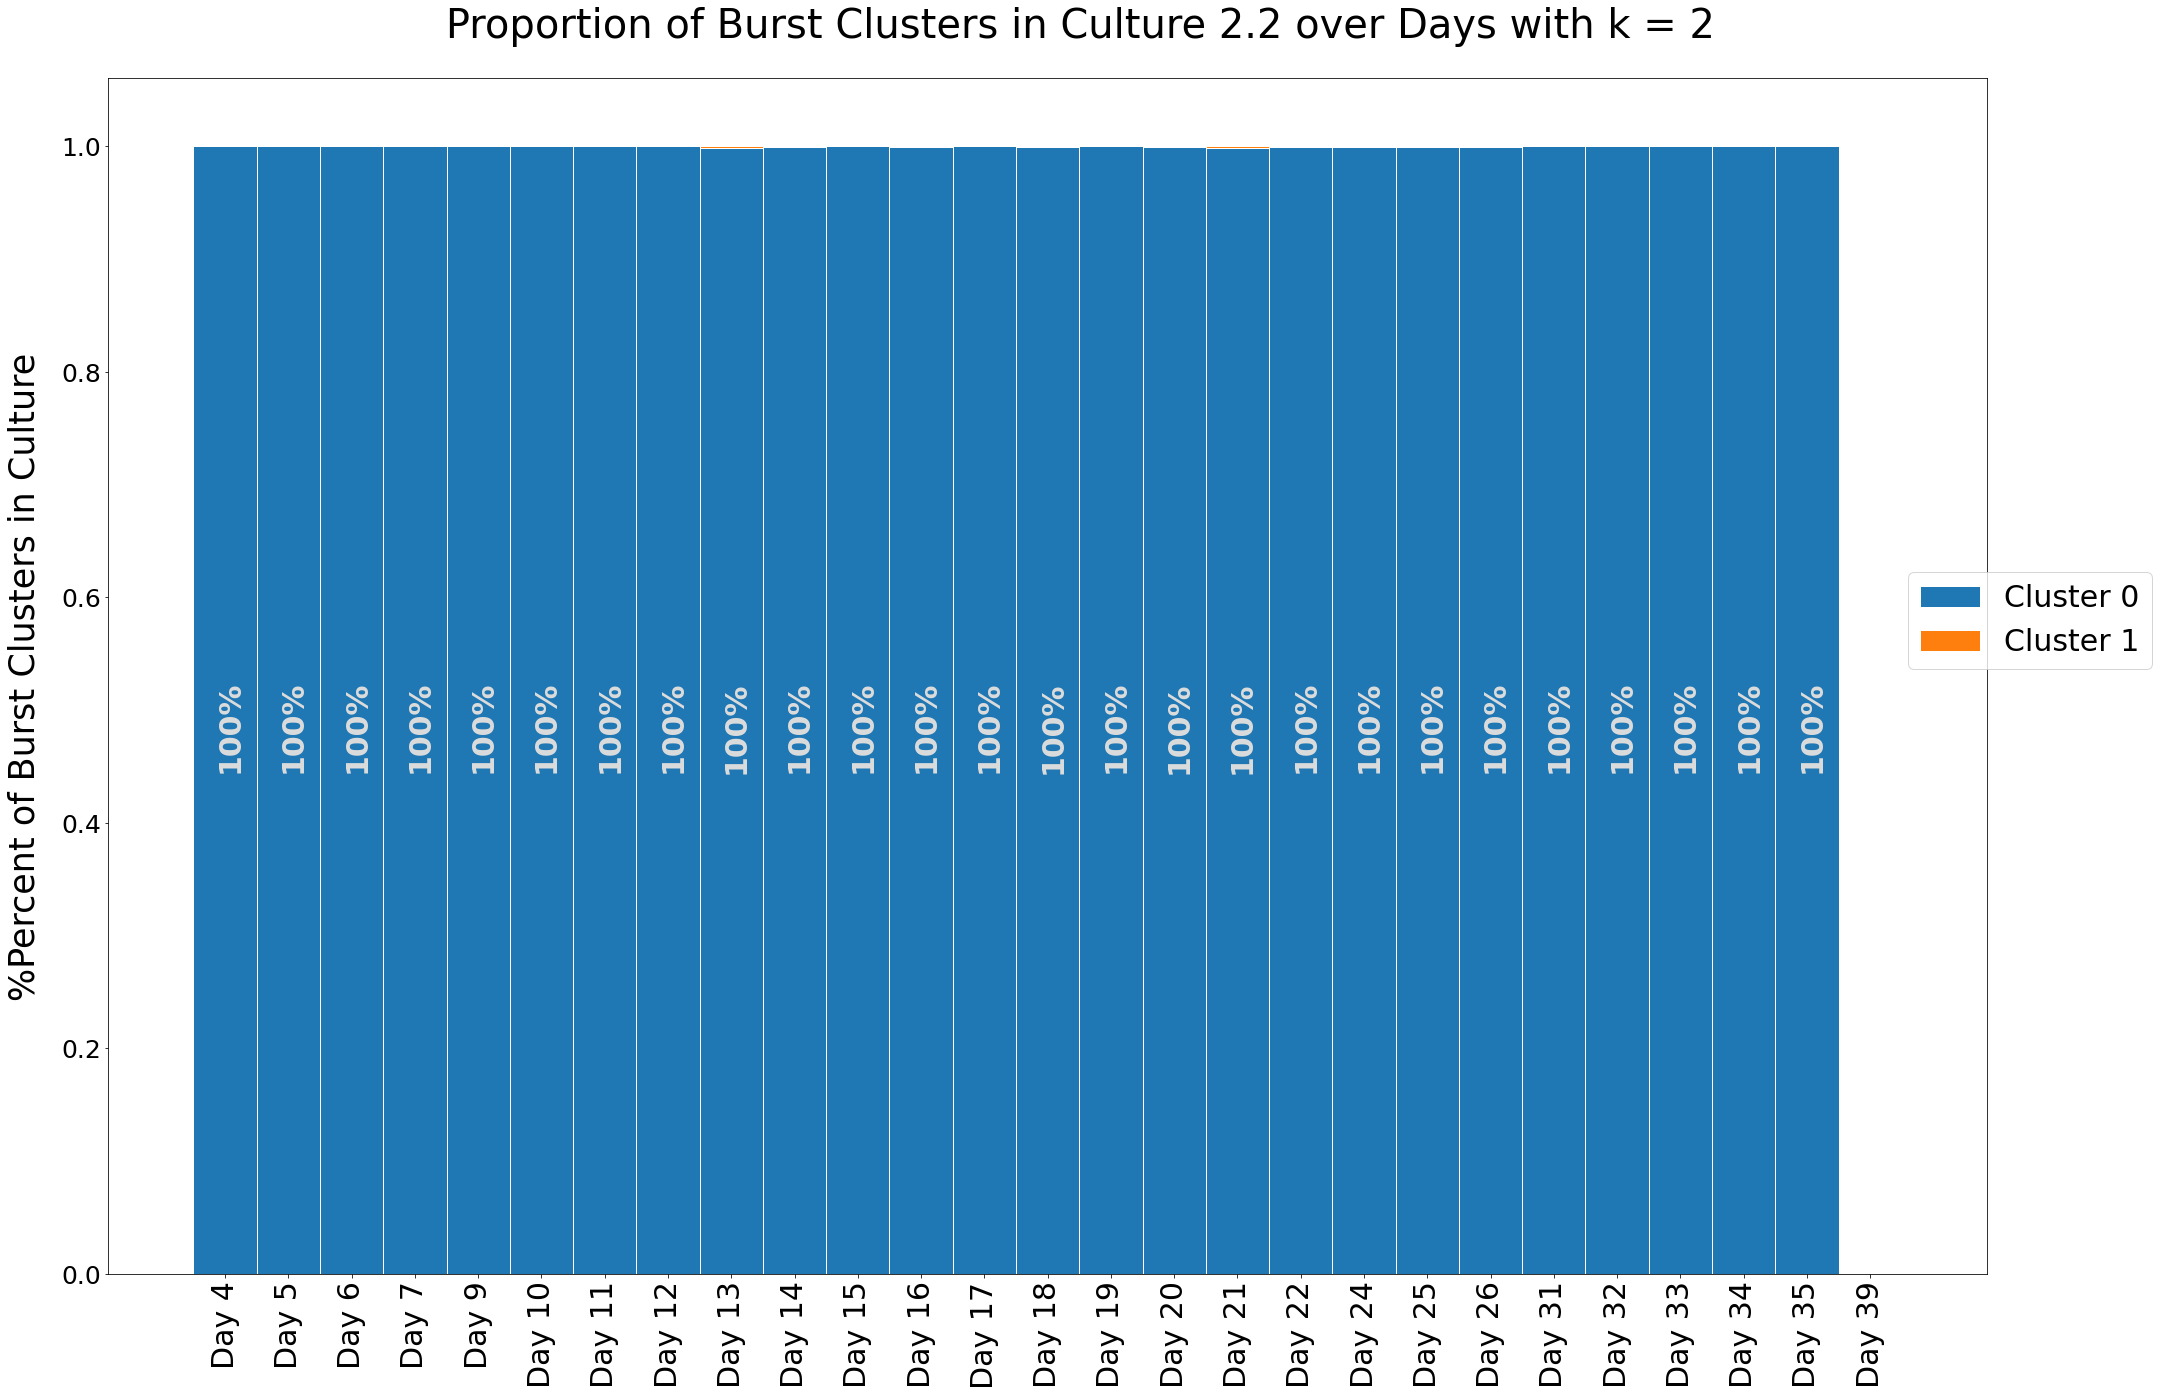

In [23]:
plot_culture_cluster_contribution(culture_plate_day_counts,culture_names_plot, culture_cluster_contribution, 
                                  colors,cluster_order = None,subplot_adjustments=subplot_adjustments, 
                                  title= title,figsize=figsize,save_file=save_file,
                                  rotate_x_labels=True)